In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

## Getting the Data

In [2]:
import csv
import urllib.request as urllib2
from collections import namedtuple

# Create a namedtuple constructor for each record in the Iris data
#    1. sepal length in cm
#    2. sepal width in cm
#    3. petal length in cm
#    4. petal width in cm
#    5. class: 
#       -- Iris-setosa
#       -- Iris-versicolour
#       -- Iris-virginica
fields = ('sepal_length', 
          'sepal_width', 
          'petal_length', 
          'petal_width', 
          'species')
IrisRecord = namedtuple('IrisRecord', fields)

# Download and read in the data from the UCI Machine Learning Repository
response = urllib2.urlopen('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data')
iris_data_csv = response.read().decode('utf-8').strip()

# Convert each record into a format that's easier to work with (i.e.,
# wrap each record in the namedtuple that we created).
data = []
for row in csv.reader(iris_data_csv.splitlines()):
    data.append(IrisRecord(
        sepal_length          = float(row[0]),
        sepal_width           = float(row[1]),
        petal_length          = float(row[2]),
        petal_width           = float(row[3]),
        species               = row[4]))

## The `scatterplot_matrix` Function

In [3]:
from itertools import cycle
from collections import defaultdict

def scatterplot_matrix(m, target=True):
    """Takes a MxN matrix and draws a scatterplot matrix
    
    This function assumes that each row in the matrix is 
    organized as features first, followed by the target 
    variable unless the target parameter is set to False.
    In that case, each row is considered to contain only
    features of the data.
    
    Keyword arguments:
    target -- if True, the last column in m is the target variable
    """
    try:
        # If each record is a namedtuple, get the list of fields;
        # we'll use those for the x- and y-axis labels of the 
        # scatterplot matrix. If target is True, don't get the
        # last field name.
        features = m[0]._fields[:-1] if target else m[0]._fields 
    except:
        features = range(len(m[0]) - 1) if target else range(len(m[0]))
        
    # If the matrix contains a target variables, create a list of classes
    if target:    
        classes = list(set(r[-1] for r in m))
        
    # Create a color map of species names to colors
    color_cycler = cycle(plt.rcParams['axes.prop_cycle'])
    cmap = defaultdict(lambda: next(color_cycler)['color'])
        
    # Set the size of the plot
    fig = plt.figure(figsize=(12, 12))
            
    # Loop through every feature and plot it against every feature
    for i, feature_row in enumerate(features):
        for j, feature_col in enumerate(features):
            # Create a new subplot
            plt.subplot(len(features), len(features), i*len(features)+j+1)
            
            # Plot the scatter plot for the current pair of features
            if i != j:
                x = [r[j] for r in m]
                y = [r[i] for r in m]
                if target:
                    c = [cmap[r[-1]] for r in m]
                else:
                    c = 'b'
                plt.scatter(x, y, edgecolors='w', c=c, linewidths=0.5)
            
            # Plot the histogram on the diagonal
            if target and i == j:
                df = [[r[i] for r in m if r[-1] == cls] for cls in classes]               
                colors = [cmap[cls] for cls in classes]
                plt.hist(df, color=colors, histtype='barstacked')
            elif i == j:
                plt.hist([r[i] for r in m], color='b', histtype='barstacked')
                                
            # Turn off the x-axis labels for everything but the last row
            if i < len(features) - 1:
                plt.tick_params(labelbottom='off')
            else:
                plt.xlabel(feature_col)
                
            # Turn off the y-axis labels for everything but the last column
            if j > 0:
                plt.tick_params(labelleft='off')
            else:
                plt.ylabel(feature_row)
            
            # Turn off all tick marks and make the label size 
            # a bit smaller than the default
            plt.tick_params(top='off', bottom='off', left='off', right='off', labelsize=8)

## Plotting the Iris Data Set

So, let's go ahead and give our `scatterplot_matrix` function a try by plotting the Iris data we read in a bit earlier in the lesson.

/Users/haolu/anaconda3/envs/tensorflow/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


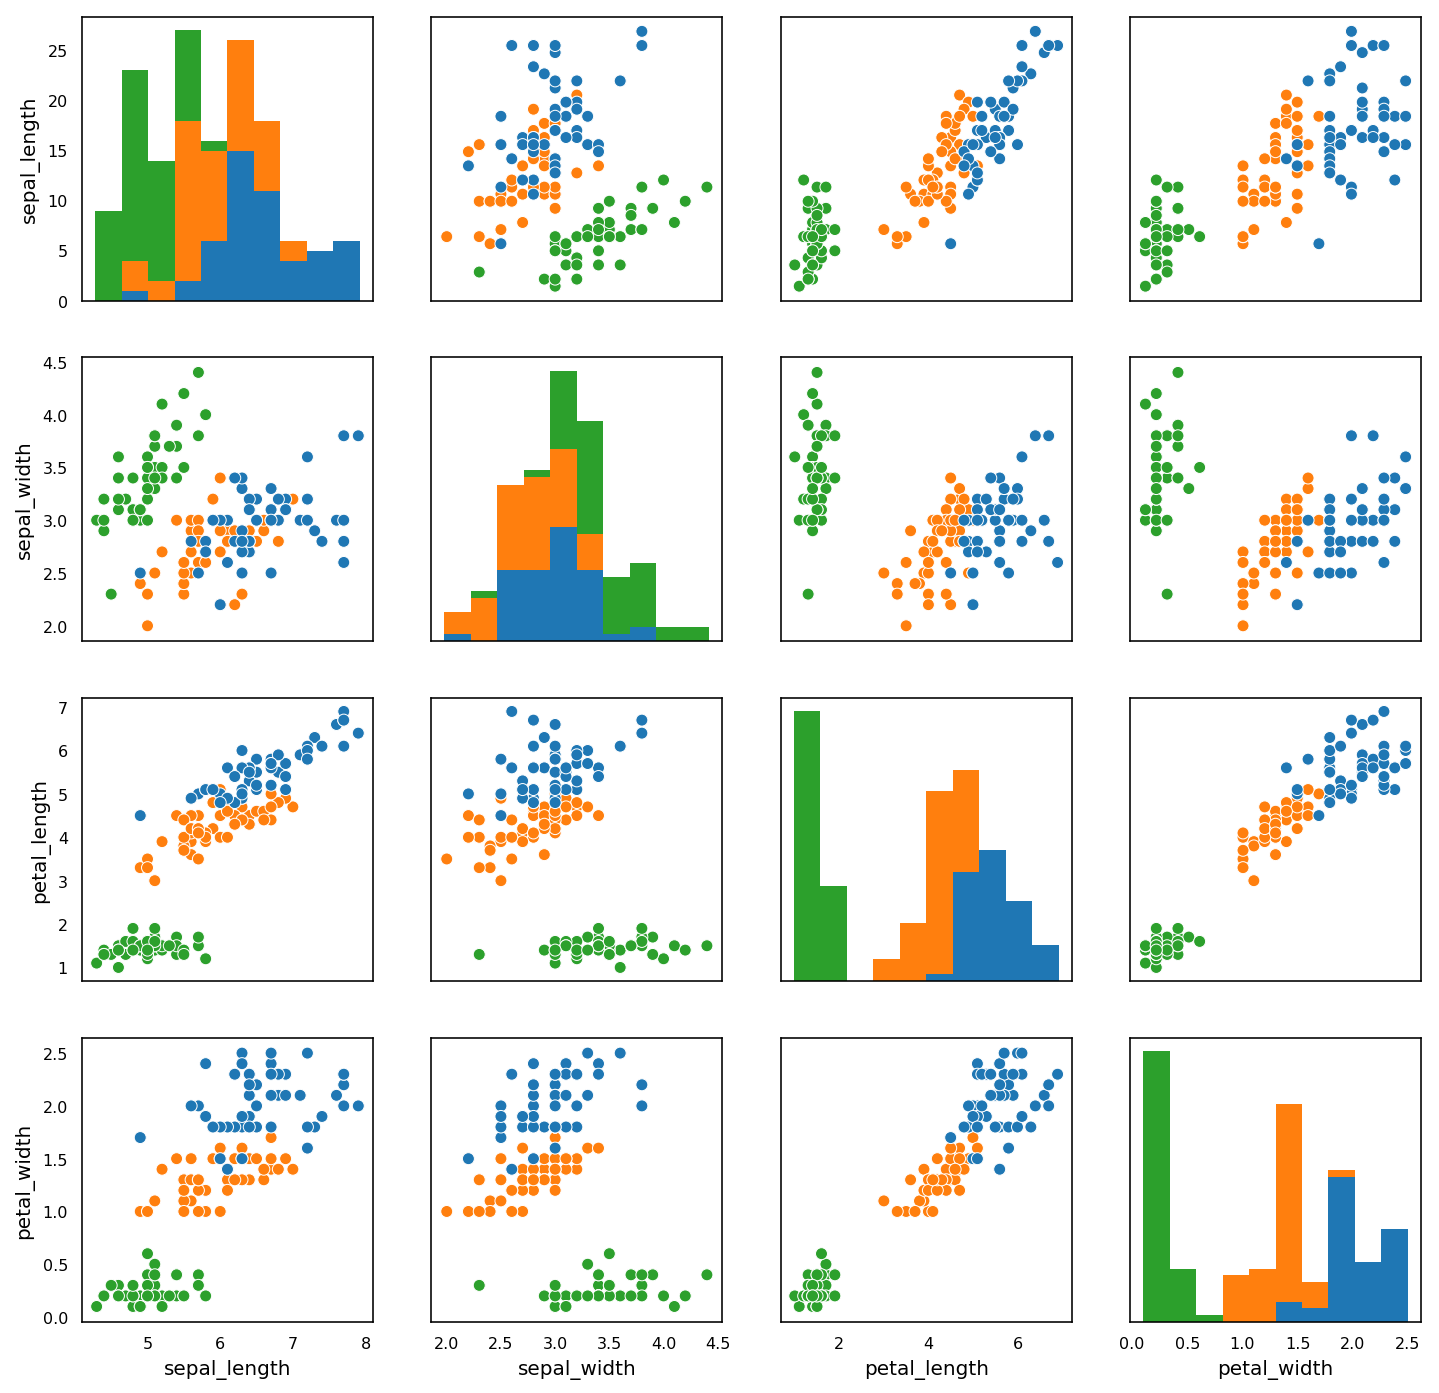

In [4]:
scatterplot_matrix(data)

## Plotting a Data Set Without a Target

/Users/haolu/anaconda3/envs/tensorflow/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


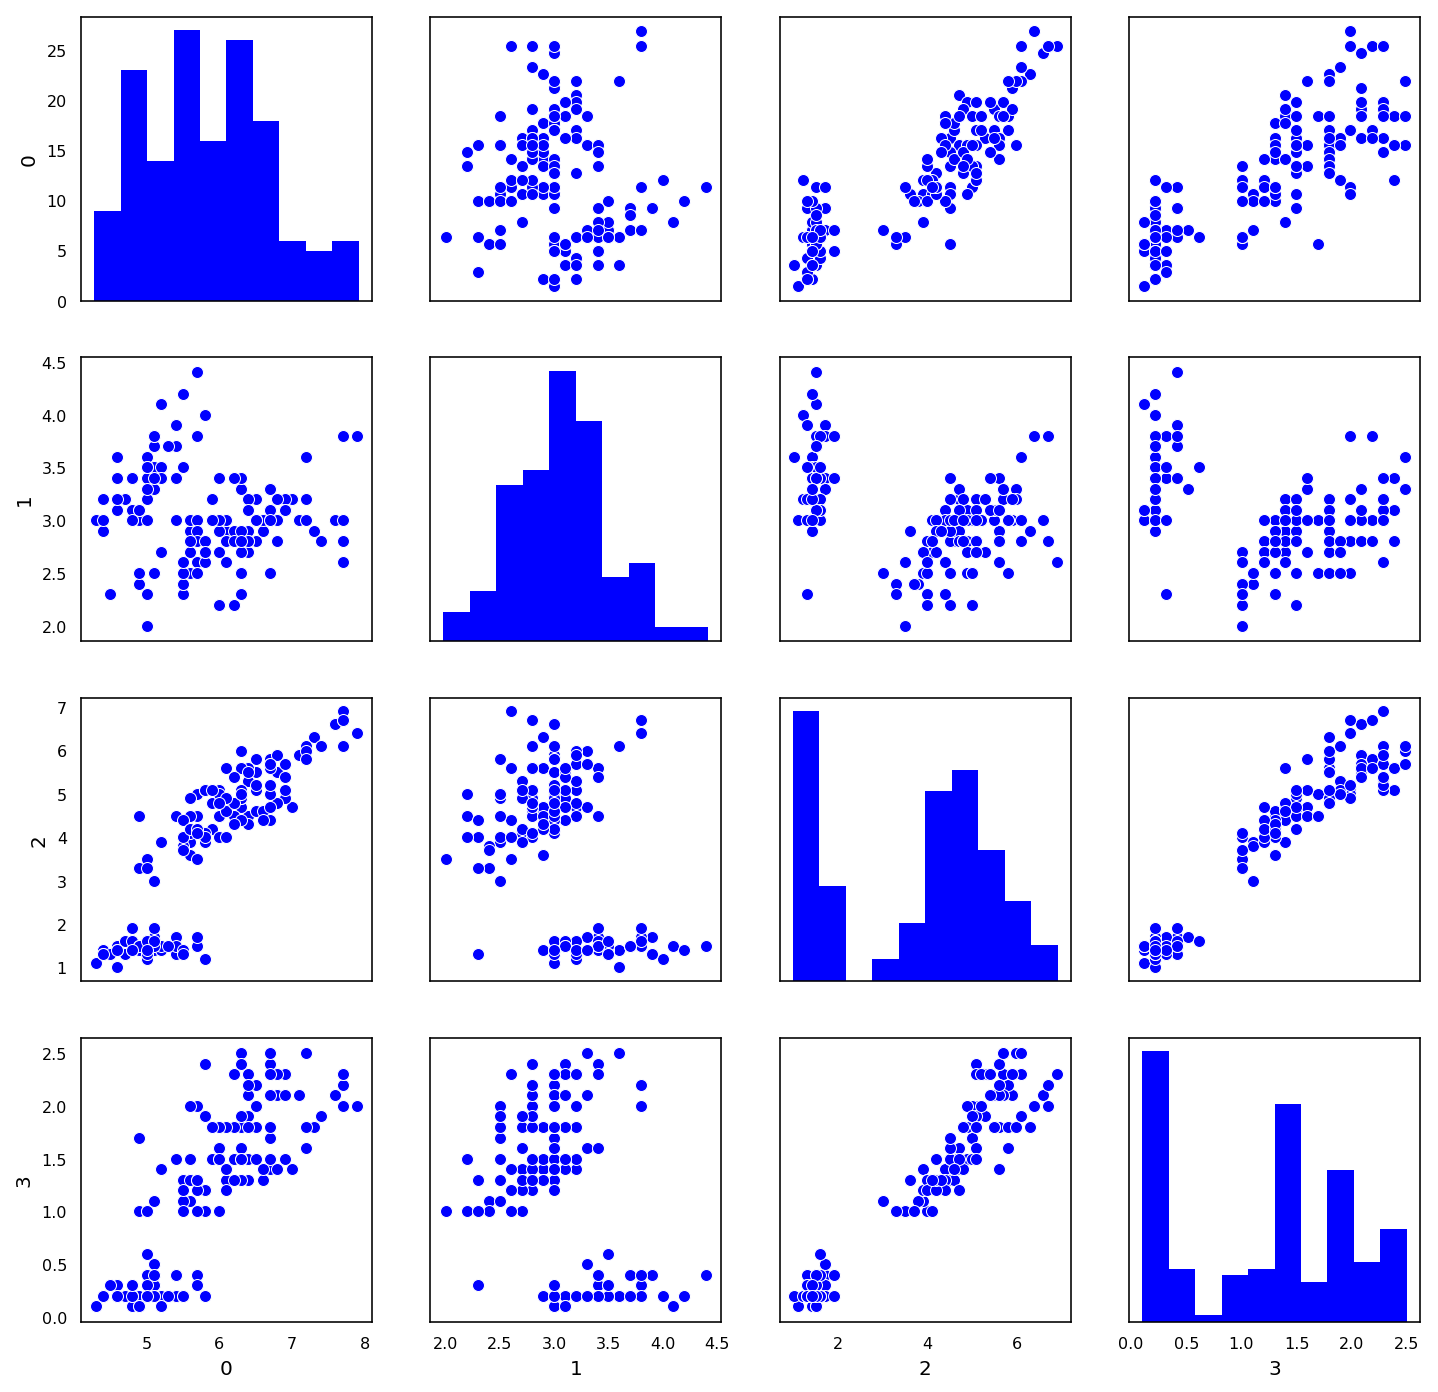

In [5]:
scatterplot_matrix([r[:-1] for r in data], target=False)